In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
!pip install -U sentence-transformers

     |████████████████████████████████| 71kB 3.7MB/s 
     |████████████████████████████████| 1.1MB 7.9MB/s 
     |████████████████████████████████| 1.1MB 13.5MB/s 
     |████████████████████████████████| 890kB 32.6MB/s 
     |████████████████████████████████| 3.0MB 50.2MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-0.3.8-cp36-none-any.whl size=101996 sha256=f63fbf4525b2cd0a3982545a1acde512be105d45a6ef26208536cce629d37913
  Stored in directory: /root/.cache/pip/wheels/27/ec/b3/d12cc8e4daf77846db6543033d3a5642f204c0320b15945647
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893257 sha256=75b21dcc431eb3eb4ff442655a709eeca1a57177190e2b9678db4cbdf2ce40a0
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sentence-transformers sacremoses


In [ ]:
from sentence_transformers import SentenceTransformer
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [ ]:

"""
Initialisation of Bert. We are using a pretrained model "roberta-large-nli-stsb-mean-tokens" for encoding the headlines.
More description about nli
"""
model = SentenceTransformer('roberta-large-nli-stsb-mean-tokens')

"""
Description about dataset.
"""
file = ("/content/gdrive/My Drive/UBS/UBS Hackathon/News_Kaggle_JsonConvertedCSV.csv")
dataset = pd.read_csv(file, delimiter=',')



100%|██████████| 1.31G/1.31G [01:48<00:00, 12.1MB/s]


In [ ]:
cat_dict = {}
for cat in category:
  cat_dict[cat] = []
for index, row in dataset.iterrows():
    if(len(cat_dict[row['category']]) < 500 ):
      cat_dict[row['category']].append([row['short_description'],row['headline'],
                                        row['authors'],row['date'],row['link']])

lol = []
for key in cat_dict:
  for value in cat_dict[key]:
    # print(key, value)
    lol.append([key,value[0],value[1],value[2],value[3],value[4]])
print(lol[0])
print(len(lol))
balanced_dataset_rows = pd.DataFrame(data=lol,columns=['category','short_description','headline','authors','data','link'])
balanced_dataset_rows.to_csv("/content/gdrive/My Drive/UBS/UBS Hackathon/kaggle_json_balanced_dataset.csv")

['CRIME', 'She left her husband. He killed their children. Just another day in America.', 'There Were 2 Mass Shootings In Texas Last Week, But Only 1 On TV', 'Melissa Jeltsen', '26/05/18', 'https://www.huffingtonpost.com/entry/texas-amanda-painter-mass-shooting_us_5b081ab4e4b0802d69caad89']
20500


In [ ]:
"""
Creating bert embeddings
"""
dataset = balanced_dataset
print(dataset.columns)
embedding_list = []
names = []
for i in range(1024):
  names.append(str(i))
counter = 0
for sentence in dataset["headline"]:
  counter += 1
  if(counter % 500 == 0):
    print("%d/%d" %(counter+1,dataset.shape[0]))
    df = pd.DataFrame(np.array(embedding_list))
    df.to_csv("/content/gdrive/My Drive/UBS Hackathon/balanced_embeddings_category_headline.csv")
  sentence_embeddings = model.encode(sentence)
  embedding_list.append(sentence_embeddings)

Clustering

In [ ]:


file = ("/content/gdrive/My Drive/UBS/UBS Hackathon/kaggle_json_balanced_dataset.csv")
dataset = pd.read_csv(file, delimiter=',')
# dataset.drop(dataset.index[len(dataset)-1],inplace=True)
n_unique_cat = dataset['category'].nunique()
category = dataset['category'].values
ctr = Counter(category)
print(ctr)
print(n_unique_cat)
# ad
print(category.shape)
embeddings = pd.read_csv("/content/gdrive/My Drive/UBS/UBS Hackathon/balanced_embeddings_category_headline.csv")
embeddings.drop('Unnamed: 0', 1,inplace=True,)
print(embeddings.shape)
print("Embedding loading done")


Counter({'CRIME': 500, 'ENTERTAINMENT': 500, 'WORLD NEWS': 500, 'IMPACT': 500, 'POLITICS': 500, 'WEIRD NEWS': 500, 'BLACK VOICES': 500, 'WOMEN': 500, 'COMEDY': 500, 'QUEER VOICES': 500, 'SPORTS': 500, 'BUSINESS': 500, 'TRAVEL': 500, 'MEDIA': 500, 'TECH': 500, 'RELIGION': 500, 'SCIENCE': 500, 'LATINO VOICES': 500, 'EDUCATION': 500, 'COLLEGE': 500, 'PARENTS': 500, 'ARTS & CULTURE': 500, 'STYLE': 500, 'GREEN': 500, 'TASTE': 500, 'HEALTHY LIVING': 500, 'THE WORLDPOST': 500, 'GOOD NEWS': 500, 'WORLDPOST': 500, 'FIFTY': 500, 'ARTS': 500, 'WELLNESS': 500, 'PARENTING': 500, 'HOME & LIVING': 500, 'STYLE & BEAUTY': 500, 'DIVORCE': 500, 'WEDDINGS': 500, 'FOOD & DRINK': 500, 'MONEY': 500, 'ENVIRONMENT': 500, 'CULTURE & ARTS': 500})
41
(20500,)
(20500, 1024)
Embedding loading done


In [ ]:
#Taking number of clusters = 41
kmeans = KMeans(n_clusters=41).fit(embeddings)
dataset["cluster"] = kmeans.labels_

In [ ]:
dataset.head()

,Unnamed: 0,category,short_description,headline,authors,data,link,cluster
0,0,CRIME,She left her husband. He killed their children...,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,26/05/18,https://www.huffingtonpost.com/entry/texas-ama...,5
1,1,CRIME,"State prosecutors say almost $84,000 had been ...",Rachel Dolezal Faces Felony Charges For Welfar...,Carla Herreria,25/05/18,https://www.huffingtonpost.com/entry/rachel-do...,20
2,2,CRIME,"“We thought we were going to die,"" one of the ...","Man Faces Charges After Pulling Knife, Stun Gu...",Jenna Amatulli,25/05/18,https://www.huffingtonpost.com/entry/man-knife...,5
3,3,CRIME,"A male student, believed to be the suspect, ha...",2 People Injured In Indiana School Shooting,Marina Fang,25/05/18,https://www.huffingtonpost.com/entry/indiana-m...,36
4,4,CRIME,"The victims, who are now adults, were enrolled...",Maryland Police Charge 3 Church Leaders With P...,Carol Kuruvilla,23/05/18,https://www.huffingtonpost.com/entry/maryland-...,30


In [ ]:
"""
Storing sample dataset with cluster id
"""
dataset.to_csv("/content/gdrive/My Drive/UBS/UBS Hackathon/balanced_dataset_with_cluster_id.csv")



In [ ]:
"""
FInding optimal cluster number n
"""
# def cluster_range:
cluster_pos = list(range(2,50,2))
cluster_pos = cluster_pos + [33,35,37,39,41,43,45,47]
cluster_pos = sorted(cluster_pos,reverse=False)

kmeans_c = []
for i in cluster_pos:
    kmeans_c.append(KMeans(n_clusters=i, random_state=0).fit(embeddings))

kmeans_iner = []
for i in kmeans_c:
    kmeans_iner.append(i.inertia_)
plt.plot(cluster_pos,kmeans_iner)


NameError: ignored

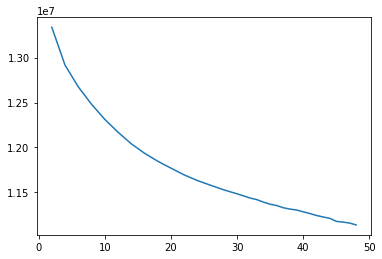

In [ ]:
plt.plot(cluster_pos,kmeans_iner)

In [ ]:
# import matplotlib.pyplot as plt
# from kneed import KneeLocator


# def identify_knee_points_incremental(x, y):
#     """
#     Incomplete. Using this to solve the flat ends issue
#     :param x:
#     :param y:
#     :return:
#     """
#     knees = []
#     for i in range(1, len(x)):
#         kl = KneeLocator(x[:i + 1], y[:i + 1], curve='convex', direction="increasing", S=5)
#         knees.append(kl.knee)
#     return knees


# def identify_single_knee_point(x, y, show_plot=False):
#     kl = KneeLocator(x, y, curve='convex', direction="increasing", S=5)
#     if show_plot:
#         kl.plot_knee()
#         plt.show()
#     return kl.knee


# def execute_knee():
#     y = [1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 5, 9, 25, 80, 190, 220, 230, 250, 260]
#     print(len(y))
#     x = [i + 1 for i in range(len(y))]
#     print(identify_single_knee_point(x, y, show_plot=True))


# if __name__ == '__main__':
#     execute_knee()

In [ ]:
kmeans_iner = []
for i in kmeans_c:
    kmeans_iner.append(i.inertia_)
plt.plot(range(1,11),kmeans_iner)

In [ ]:
cluster_pos_ext = list(range(50,75,2))
for i in cluster_pos_ext:
    kmeans_c.append(KMeans(n_clusters=i, random_state=0).fit(embeddings))


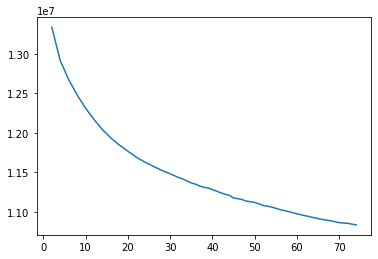

In [ ]:
cluster_pos_total = cluster_pos+cluster_pos_ext
kmeans_iner = []
for i in kmeans_c:
    kmeans_iner.append(i.inertia_)
plt.plot(cluster_pos_total,kmeans_iner)

32

In [ ]:
"""
db scan
"""

from sklearn.cluster import DBSCAN
dbscan_model = DBSCAN(10**-83).fit(embeddings)
len(list(set(list(dbscan_model.labels_))))

9

9

In [ ]:

for n_cluster in range(n_unique_cat,4*n_unique_cat):
  print("Num clust ", n_cluster)
  kmeans = KMeans(n_clusters=n_cluster).fit(embeddings)
  cluster_list = []
  for i in range(n_cluster):
    cluster_list.append([])
  
  labels = kmeans.labels_
  
  ctr = Counter(labels)
  print(ctr)
  for i in range(category.shape[0]-1):
    cluster_list[labels[i]].append(category[i])
  for i in range(len(cluster_list)):
    ctr = Counter(cluster_list[i])
    print(ctr.most_common(2))
    cls = ctr.most_common(1)[0][0]
    ct = ctr.most_common(1)[0][1]
    print(cls,ct*100/float(len(cluster_list[i])))
    print()
  # sd

In [ ]:
embeddings

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0.777583,-0.839593,-0.186365,-0.114739,-0.514888,-0.734551,-0.810859,0.204646,-0.682363,-0.376312,0.488864,0.955362,0.449106,-0.651797,-0.443514,-0.388315,0.843863,0.535317,-0.468918,0.110834,-0.606952,-0.714928,-0.146405,-1.059964,0.273718,1.793167,0.445923,-0.182459,0.314435,0.289994,-0.912042,-0.340704,-1.263728,0.061767,-0.213983,0.926607,-0.319006,0.787505,-0.393671,0.281370,...,-0.221811,-0.081698,-0.060701,-0.412341,-0.910275,0.678408,-0.256539,0.281486,-0.208778,0.153004,-1.231275,0.491605,0.035246,-0.738413,-0.257973,-0.155214,0.106682,-0.669202,0.701425,-0.359420,-0.524373,-0.893927,0.034458,-0.490916,-0.200892,0.232134,-1.230195,-1.145777,-1.043101,-0.026552,0.379321,-0.971672,0.243383,2.752189,1.310201,0.550962,1.028021,0.479747,1.366224,1.356230
1,-0.387265,1.173666,-0.225808,0.279327,0.790813,-1.389146,0.267028,0.514638,0.808745,-0.960774,-0.373218,0.017402,0.491598,2.444045,0.638080,1.509382,1.433211,1.150300,1.284524,0.113749,0.797762,-0.196594,-1.053225,-0.862613,-0.667374,0.691623,-0.942842,-0.904292,-0.171452,-1.371663,-0.163172,0.570214,-0.283845,-0.224443,0.156429,0.231762,1.038044,-0.213225,0.612072,-0.366206,...,1.271975,-0.423987,-0.822138,-0.154329,0.856057,1.383846,-1.547496,0.191179,-1.898068,-1.434460,0.145557,0.033423,0.490423,-0.556096,0.201880,-0.453392,1.237041,-0.393358,-1.160637,0.576817,-0.039559,-0.138313,0.534013,0.213453,1.406259,0.108060,-0.610771,-0.044194,0.257018,0.295150,-0.000790,0.677853,0.539068,0.671299,-0.861262,1.716880,-0.554732,-0.202477,0.016438,-2.007487
2,-0.508211,1.010424,0.601845,0.147632,-0.621743,-0.444147,1.490199,-1.943423,-0.609924,0.696384,-0.136893,-1.233667,1.074404,0.021836,0.150549,-0.474201,2.101711,-0.281818,0.327386,1.785845,0.592019,1.020073,-0.283704,0.568464,-0.518660,0.644987,-0.787695,-0.082307,-0.327086,0.079915,-1.243805,-0.630869,-0.242664,-1.271542,-2.792175,-0.665921,-0.827607,-0.657639,0.410968,1.091958,...,1.076510,-0.771406,0.344289,0.419252,1.394660,-0.070711,0.141929,0.128548,-0.861537,-1.442540,-0.369533,-1.394456,0.283891,1.178956,-0.426661,0.175763,1.903812,-1.228737,-0.928087,1.147226,-0.665809,-0.688248,0.044522,-0.591297,-0.220100,0.474552,0.727606,-1.280489,0.443529,0.878409,0.686865,-0.763026,0.457041,1.760771,0.523718,-0.178439,0.269108,-0.345605,-1.714651,-0.579827
3,1.113225,-0.536542,0.159347,-0.986996,0.892644,-0.379673,-0.337585,1.347607,-1.080035,-0.086088,0.764759,-0.133308,0.016892,-0.542224,-1.026628,-1.161321,-0.617948,-0.150294,-0.418111,1.276513,-1.062723,-2.342728,1.267130,-0.553518,-0.378462,0.682872,-0.480748,-0.952861,-0.441664,1.462004,-0.776687,-0.498485,-0.980993,0.272639,-0.005189,-1.103823,-1.000766,0.507143,0.551059,-0.769457,...,0.535042,-0.394174,0.680956,0.447185,-0.735435,-0.868620,0.201095,-1.284989,-0.195550,-0.036969,-0.702569,-0.189573,0.433197,-0.705446,0.154075,-0.100207,1.203059,-0.534247,0.121745,-1.337035,-0.697692,-0.948894,-0.772347,-0.509135,0.553232,1.378263,-1.994046,-2.385798,-0.652196,-1.286896,-0.153213,-0.780468,-0.016646,1.625074,-0.313434,0.862398,1.257591,0.259107,0.304568,-0.373440
4,-0.155662,0.687842,-0.223728,-0.071299,0.967401,0.872572,0.380493,0.795575,-0.624610,-0.216933,-0.761960,-1.902870,1.862177,-0.173022,0.707009,-0.002851,1.059105,-0.434614,0.063788,0.778563,0.203450,-0.903702,0.046231,-0.338065,1.825008,-0.320635,-0.299133,-0.753825,0.587438,-0.565224,1.400242,-0.505157,0.410432,-0.422995,-0.531455,-1.651593,0.493592,0.495315,-0.771311,-0.062497,...,0.087057,-0.486979,0.525864,0.212996,-1.540377,0.688577,-0.176013,0.678109,-0.159670,-0.299731,-0.025212,-1.128496,1.459857,-2.585110,-0.987835,0.296449,0.848013,-0.001385,-0.639327,0.671163,0.194512,0.223831,0.965428,-1.096387,0.2450

In [ ]:

for n_cluster in [41]:
  print("Num clust ", n_cluster)
  kmeans = KMeans(n_clusters=n_cluster).fit(embeddings)
  cluster_list = []
  for i in range(n_cluster):
    cluster_list.append([])
  
  labels = kmeans.labels_
  
  ctr = Counter(labels)
  print(ctr)
  for i in range(category.shape[0]-1):
    cluster_list[labels[i]].append(category[i])
  for i in range(len(cluster_list)):
    ctr = Counter(cluster_list[i])
    print(ctr.most_common(2))
    cls = ctr.most_common(1)[0][0]
    ct = ctr.most_common(1)[0][1]
    print(cls,ct*100/float(len(cluster_list[i])))
    print()
  # sd

Num clust  41
Counter({1: 808, 14: 719, 24: 678, 28: 677, 7: 674, 23: 641, 36: 633, 10: 632, 20: 621, 35: 618, 11: 605, 5: 601, 3: 581, 34: 576, 0: 569, 22: 562, 4: 559, 19: 549, 27: 527, 8: 499, 9: 498, 38: 498, 29: 496, 33: 489, 40: 487, 39: 482, 30: 482, 31: 427, 2: 425, 18: 416, 37: 412, 17: 391, 12: 353, 25: 351, 32: 346, 21: 328, 26: 307, 15: 298, 6: 294, 13: 261, 16: 130})
[('WOMEN', 94), ('QUEER VOICES', 45)]
WOMEN 16.520210896309315

[('MEDIA', 107), ('COMEDY', 75)]
MEDIA 13.242574257425742

[('EDUCATION', 166), ('COLLEGE', 72)]
EDUCATION 39.05882352941177

[('STYLE & BEAUTY', 159), ('STYLE', 129)]
STYLE & BEAUTY 27.36660929432014

[('THE WORLDPOST', 55), ('WORLD NEWS', 51)]
THE WORLDPOST 9.838998211091234

[('BUSINESS', 73), ('MONEY', 68)]
BUSINESS 12.146422628951747

[('RELIGION', 152), ('WORLD NEWS', 12)]
RELIGION 51.70068027210884

[('TRAVEL', 63), ('SPORTS', 41)]
TRAVEL 9.347181008902076

[('PARENTS', 147), ('PARENTING', 86)]
PARENTS 29.458917835671343

[('CRIME', 146), (

In [ ]:
cat_percentage_bert = []
for i in range(0,1):
  n_cluster = 41
  print("Num clust ", n_cluster)
#   kmeans = KMeans(n_clusters=41).fit(embeddings)
  cluster_list = []
  for i in range(n_cluster):
    cluster_list.append([])
  
  labels = kmeans.labels_
  
  ctr = Counter(labels)
  print(ctr)
  for i in range(category.shape[0]-1):
    cluster_list[labels[i]].append(category[i])
  for i in range(len(cluster_list)):
    ctr = Counter(cluster_list[i])
    # print(ctr.most_common(2))
    cls = ctr.most_common(1)[0][0]
    ct = ctr.most_common(1)[0][1]
    cat_percentage.append((cls,ct*100/float(len(cluster_list[i]))))
    print(cls,ct*100/float(len(cluster_list[i])))
    # print()
  # sd

Num clust  41
Counter({35: 722, 25: 718, 12: 672, 15: 671, 13: 638, 22: 633, 37: 632, 4: 618, 8: 610, 2: 596, 40: 581, 23: 577, 34: 576, 11: 569, 29: 556, 31: 544, 3: 541, 14: 539, 30: 533, 18: 527, 0: 505, 27: 498, 24: 493, 7: 489, 1: 478, 39: 474, 5: 468, 10: 439, 33: 430, 36: 425, 9: 416, 16: 408, 28: 393, 26: 386, 32: 360, 19: 359, 21: 357, 6: 282, 20: 273, 38: 265, 17: 248})
CRIME 26.93069306930693
PARENTING 26.569037656903767
TRAVEL 12.583892617449665
ENTERTAINMENT 9.981515711645102
COMEDY 21.68284789644013
HEALTHY LIVING 19.23076923076923
RELIGION 53.90070921985816
COMEDY 21.267893660531698
DIVORCE 9.836065573770492
HOME & LIVING 17.067307692307693
GREEN 8.428246013667426
WOMEN 16.344463971880494
POLITICS 6.696428571428571
FOOD & DRINK 37.460815047021946
STYLE & BEAUTY 31.354359925788497
WEIRD NEWS 8.64381520119225
GOOD NEWS 19.607843137254903
GOOD NEWS 28.629032258064516
FOOD & DRINK 5.502846299810247
SCIENCE 49.58217270194986
HOME & LIVING 10.989010989010989
HOME & LIVING 12.8

In [ ]:
cat_percentage

[('CRIME', 26.93069306930693),
 ('PARENTING', 26.569037656903767),
 ('TRAVEL', 12.583892617449665),
 ('ENTERTAINMENT', 9.981515711645102),
 ('COMEDY', 21.68284789644013),
 ('HEALTHY LIVING', 19.23076923076923),
 ('RELIGION', 53.90070921985816),
 ('COMEDY', 21.267893660531698),
 ('DIVORCE', 9.836065573770492),
 ('HOME & LIVING', 17.067307692307693),
 ('GREEN', 8.428246013667426),
 ('WOMEN', 16.344463971880494),
 ('POLITICS', 6.696428571428571),
 ('FOOD & DRINK', 37.460815047021946),
 ('STYLE & BEAUTY', 31.354359925788497),
 ('WEIRD NEWS', 8.64381520119225),
 ('GOOD NEWS', 19.607843137254903),
 ('GOOD NEWS', 28.629032258064516),
 ('FOOD & DRINK', 5.502846299810247),
 ('SCIENCE', 49.58217270194986),
 ('HOME & LIVING', 10.989010989010989),
 ('HOME & LIVING', 12.88515406162465),
 ('ENVIRONMENT', 6.6350710900473935),
 ('ENTERTAINMENT', 6.239168110918544),
 ('PARENTS', 30.425963488843813),
 ('CULTURE & ARTS', 14.08647140864714),
 ('FIFTY', 11.139896373056995),
 ('WEDDINGS', 55.22088353413655)

In [ ]:

file = ("/content/gdrive/My Drive/UBS/UBS Hackathon/bert_res_cat.csv")
bert_res = pd.read_csv(file, delimiter=',')
bert_res["Category"] = bert_res["Category"].str.lower()
bert_res.sort_values(by=['Category'],axis=0,inplace=True )

In [ ]:


file = ("/content/gdrive/My Drive/UBS/UBS Hackathon/LSTM_encoding_percent.csv")
lstm_res = pd.read_csv(file, delimiter=',')
lstm_res.head()
lstm_res["Category"] = lstm_res["Category"].str.lower()
lstm_res.sort_values(by=['Category'],axis=0,inplace=True )

In [ ]:
list(lstm_res["Category"]) == list(bert_res["Category"] )

True

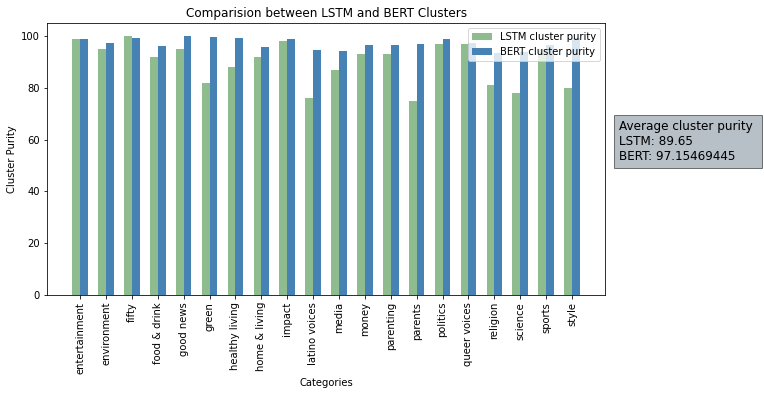

In [ ]:
x = list(lstm_res["Category"])[10:30]
y1 = list(lstm_res["Percentage"])[10:30]
y2 = list(bert_res["Percentage"])[10:30]
# x = list(lstm_res["Category"])
# y1 = list(lstm_res["Percentage"])
# y2 = list(bert_res["Percentage"])

ind = np.arange(len(x))
# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.3       

avg_lstm = np.average(y1)
avg_bert = np.average(y2)
# Plotting
plt.bar(ind, y1 , width, label='LSTM cluster purity',color='darkseagreen')
plt.bar(ind+width , y2, width, label='BERT cluster purity',color='steelblue')

plt.xlabel('Categories')
plt.ylabel('Cluster Purity')
plt.title('Comparision between LSTM and BERT Clusters')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width / 2, x,rotation='vertical')

plt.figtext(0.92,0.5, "Average cluster purity \nLSTM: "+str(avg_lstm)+"\nBERT: "+str(avg_bert), ha="left", fontsize=12, bbox={"facecolor":"slategray", "alpha":0.5, "pad":5})

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()


In [ ]:
#reference article in the presentation
dataset.head()

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,26/05/18
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,26/05/18
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,26/05/18
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,26/05/18
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",26/05/18


In [ ]:
file1 = ("/content/gdrive/My Drive/UBS/UBS Hackathon/kaggle_json_balanced_dataset.csv")
dataset = pd.read_csv(file1, delimiter=',')

file2 = ("/content/gdrive/My Drive/UBS/UBS Hackathon/balanced_dataset_with_cluster_id.csv")
data_w_cluster = pd.read_csv(file2, delimiter=',')

embeddings = pd.read_csv("/content/gdrive/My Drive/UBS/UBS Hackathon/balanced_embeddings_category_headline.csv")


In [ ]:
data_w_cluster[["category","headline","authors","data","cluster"]].iloc[0:200]

,category,headline,authors,data,cluster
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,26/05/18,5
1,CRIME,Rachel Dolezal Faces Felony Charges For Welfar...,Carla Herreria,25/05/18,20
2,CRIME,"Man Faces Charges After Pulling Knife, Stun Gu...",Jenna Amatulli,25/05/18,5
3,CRIME,2 People Injured In Indiana School Shooting,Marina Fang,25/05/18,36
4,CRIME,Maryland Police Charge 3 Church Leaders With P...,Carol Kuruvilla,23/05/18,30
...,...,...,...,...,...
195,CRIME,Alleged Airplane Smoker Threatens To 'Kill Eve...,Ed Mazza,12/12/17,5
196,CRIME,Police Confirm Another Freeway Shooting In Mic...,David Lohr,11/12/17,5
197,CRIME,New York Bomber Sought An ISIS-Inspired Attack...,"Willa Frej, Hayley Miller, and Nina Golgowski",11/12/17,9
198,CRIME,Landlord Accused Of Masturbating On Tenant's C...,David Moye,11/12/17,37


In [ ]:
embeddings.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0,0.777583,-0.839593,-0.186365,-0.114739,-0.514888,-0.734551,-0.810859,0.204646,-0.682363,-0.376312,0.488864,0.955362,0.449106,-0.651797,-0.443514,-0.388315,0.843863,0.535317,-0.468918,0.110834,-0.606952,-0.714928,-0.146405,-1.059964,0.273718,1.793167,0.445923,-0.182459,0.314435,0.289994,-0.912042,-0.340704,-1.263728,0.061767,-0.213983,0.926607,-0.319006,0.787505,-0.393671,...,-0.221811,-0.081698,-0.060701,-0.412341,-0.910275,0.678408,-0.256539,0.281486,-0.208778,0.153004,-1.231275,0.491605,0.035246,-0.738413,-0.257973,-0.155214,0.106682,-0.669202,0.701425,-0.359420,-0.524373,-0.893927,0.034458,-0.490916,-0.200892,0.232134,-1.230195,-1.145777,-1.043101,-0.026552,0.379321,-0.971672,0.243383,2.752189,1.310201,0.550962,1.028021,0.479747,1.366224,1.356230
1,1,-0.387265,1.173666,-0.225808,0.279327,0.790813,-1.389146,0.267028,0.514638,0.808745,-0.960774,-0.373218,0.017402,0.491598,2.444045,0.638080,1.509382,1.433211,1.150300,1.284524,0.113749,0.797762,-0.196594,-1.053225,-0.862613,-0.667374,0.691623,-0.942842,-0.904292,-0.171452,-1.371663,-0.163172,0.570214,-0.283845,-0.224443,0.156429,0.231762,1.038044,-0.213225,0.612072,...,1.271975,-0.423987,-0.822138,-0.154329,0.856057,1.383846,-1.547496,0.191179,-1.898068,-1.434460,0.145557,0.033423,0.490423,-0.556096,0.201880,-0.453392,1.237041,-0.393358,-1.160637,0.576817,-0.039559,-0.138313,0.534013,0.213453,1.406259,0.108060,-0.610771,-0.044194,0.257018,0.295150,-0.000790,0.677853,0.539068,0.671299,-0.861262,1.716880,-0.554732,-0.202477,0.016438,-2.007487
2,2,-0.508211,1.010424,0.601845,0.147632,-0.621743,-0.444147,1.490199,-1.943423,-0.609924,0.696384,-0.136893,-1.233667,1.074404,0.021836,0.150549,-0.474201,2.101711,-0.281818,0.327386,1.785845,0.592019,1.020073,-0.283704,0.568464,-0.518660,0.644987,-0.787695,-0.082307,-0.327086,0.079915,-1.243805,-0.630869,-0.242664,-1.271542,-2.792175,-0.665921,-0.827607,-0.657639,0.410968,...,1.076510,-0.771406,0.344289,0.419252,1.394660,-0.070711,0.141929,0.128548,-0.861537,-1.442540,-0.369533,-1.394456,0.283891,1.178956,-0.426661,0.175763,1.903812,-1.228737,-0.928087,1.147226,-0.665809,-0.688248,0.044522,-0.591297,-0.220100,0.474552,0.727606,-1.280489,0.443529,0.878409,0.686865,-0.763026,0.457041,1.760771,0.523718,-0.178439,0.269108,-0.345605,-1.714651,-0.579827
3,3,1.113225,-0.536542,0.159347,-0.986996,0.892644,-0.379673,-0.337585,1.347607,-1.080035,-0.086088,0.764759,-0.133308,0.016892,-0.542224,-1.026628,-1.161321,-0.617948,-0.150294,-0.418111,1.276513,-1.062723,-2.342728,1.267130,-0.553518,-0.378462,0.682872,-0.480748,-0.952861,-0.441664,1.462004,-0.776687,-0.498485,-0.980993,0.272639,-0.005189,-1.103823,-1.000766,0.507143,0.551059,...,0.535042,-0.394174,0.680956,0.447185,-0.735435,-0.868620,0.201095,-1.284989,-0.195550,-0.036969,-0.702569,-0.189573,0.433197,-0.705446,0.154075,-0.100207,1.203059,-0.534247,0.121745,-1.337035,-0.697692,-0.948894,-0.772347,-0.509135,0.553232,1.378263,-1.994046,-2.385798,-0.652196,-1.286896,-0.153213,-0.780468,-0.016646,1.625074,-0.313434,0.862398,1.257591,0.259107,0.304568,-0.373440
4,4,-0.155662,0.687842,-0.223728,-0.071299,0.967401,0.872572,0.380493,0.795575,-0.624610,-0.216933,-0.761960,-1.902870,1.862177,-0.173022,0.707009,-0.002851,1.059105,-0.434614,0.063788,0.778563,0.203450,-0.903702,0.046231,-0.338065,1.825008,-0.320635,-0.299133,-0.753825,0.587438,-0.565224,1.400242,-0.505157,0.410432,-0.422995,-0.531455,-1.651593,0.493592,0.495315,-0.771311,...,0.087057,-0.486979,0.525864,0.212996,-1.540377,0.688577,-0.176013,0.678109,-0.159670,-0.299731,-0.025212,-1.128496,1.459857,-2.585110,-0.987835,0.296449,0.848013,-0.001385,-0.639327,0.671163,0.194512,0.223831,0.965428,-1.096387,0.245090,0.247550,-0.481026,-0.39842

In [ ]:
data_w_cluster.loc[(data_w_cluster["authors"] == "Dominique Mosbergen") & (data_w_cluster["cluster"] == 32)][["category","headline","authors","data","cluster"]].iloc[0]

category                                                CRIME
headline    Baltimore Prosecutor Throws Out 34 Cases After...
authors                                   Dominique Mosbergen
data                                                 30/07/17
cluster                                                    32
Name: 340, dtype: object

In [ ]:
print(data_w_cluster.loc[(data_w_cluster["authors"] == "Dominique Mosbergen") & (data_w_cluster["cluster"] == 32)][["category","headline","authors","data","cluster"]].iloc[0]["headline"])

Baltimore Prosecutor Throws Out 34 Cases After Officer Caught Allegedly Planting Drugs
